In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

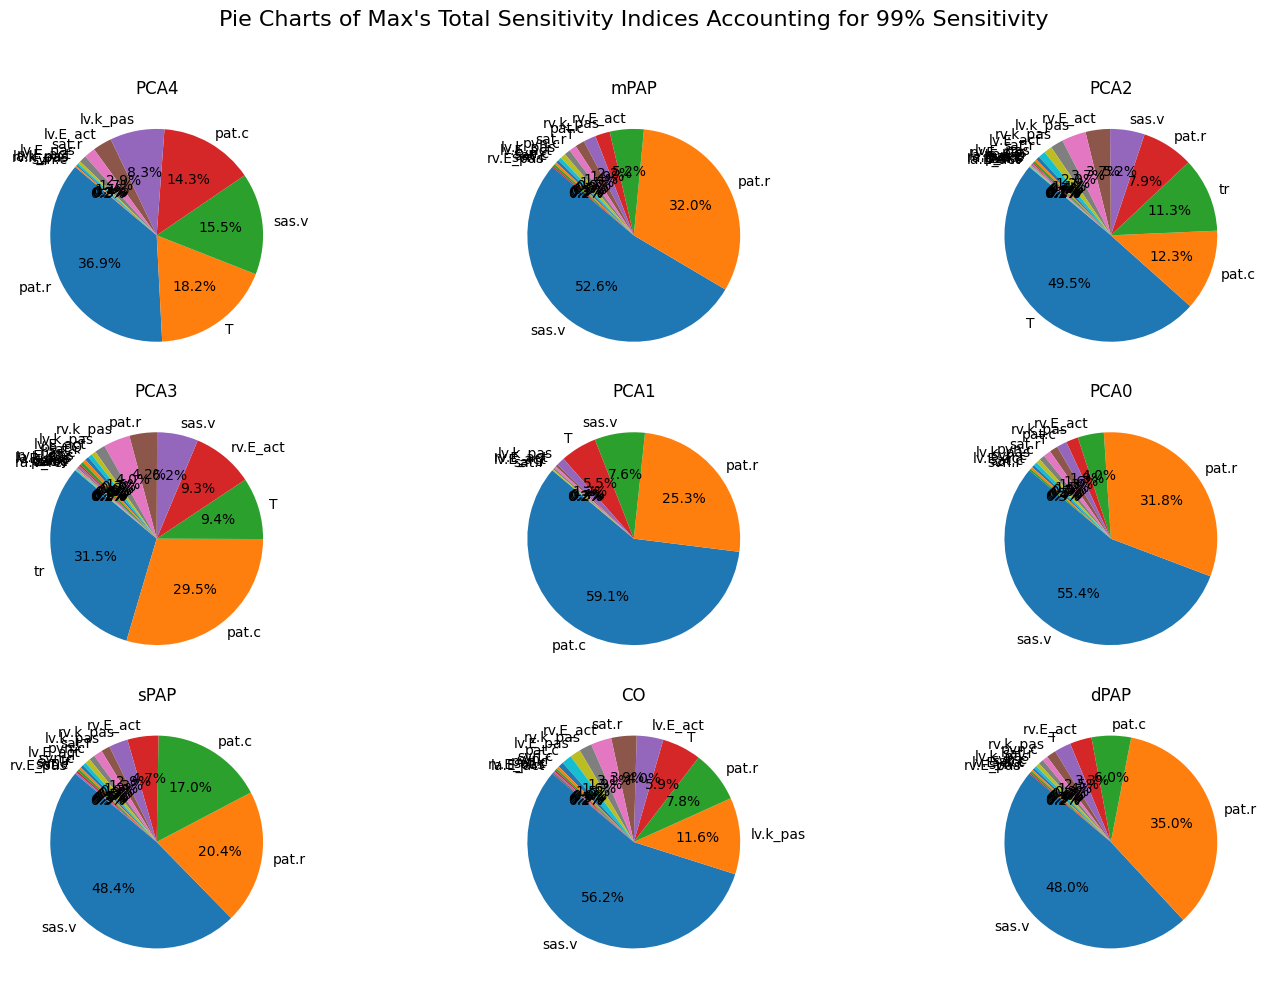

In [2]:

# Directory containing the CSV files
csv_directory = "/Users/pmzff/Documents/GitHub/ModularCircFF/Max_param_Emulator/Max_ST"

# Get list of CSV files in the directory
csv_files = [f for f in os.listdir(csv_directory) if f.endswith(".csv")]

# Set up the overall plot
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle("Pie Charts of Max's Total Sensitivity Indices Accounting for 99% Sensitivity", fontsize=16)

# Flatten the axes array to easily index subplots
axes = axes.flatten()

# Loop through the CSV files and plot pie charts
for i, file_name in enumerate(csv_files):
    # Read the CSV file
    file_path = os.path.join(csv_directory, file_name)
    df = pd.read_csv(file_path, index_col=0)
    
    # Extract data for the pie chart
    labels = df.index
    sizes = df["ST"]

    # Sort sizes and compute cumulative contribution
    sorted_indices = sizes.argsort()[::-1]
    sorted_sizes = sizes.iloc[sorted_indices]
    sorted_labels = labels[sorted_indices]

    cumulative_sum = sorted_sizes.cumsum()
    total_sum = sorted_sizes.sum()

    # Filter labels accounting for 95% of sensitivity
    significant_indices = cumulative_sum <= 0.99 * total_sum

    # Include the last element if necessary to reach the threshold
    #if not significant_indices.iloc[-1]:
    #    significant_indices.iloc[significant_indices.idxmax() + 1] = True

    filtered_sizes = sorted_sizes[significant_indices]
    filtered_labels = sorted_labels[significant_indices]

     # Extract title as the part after the last underscore in the filename
    title = file_name.rsplit("_", 1)[-1].replace(".csv", "")

    # Plot pie chart
    axes[i].pie(filtered_sizes, labels=filtered_labels, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(title)

# Remove unused subplots
for j in range(len(csv_files), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

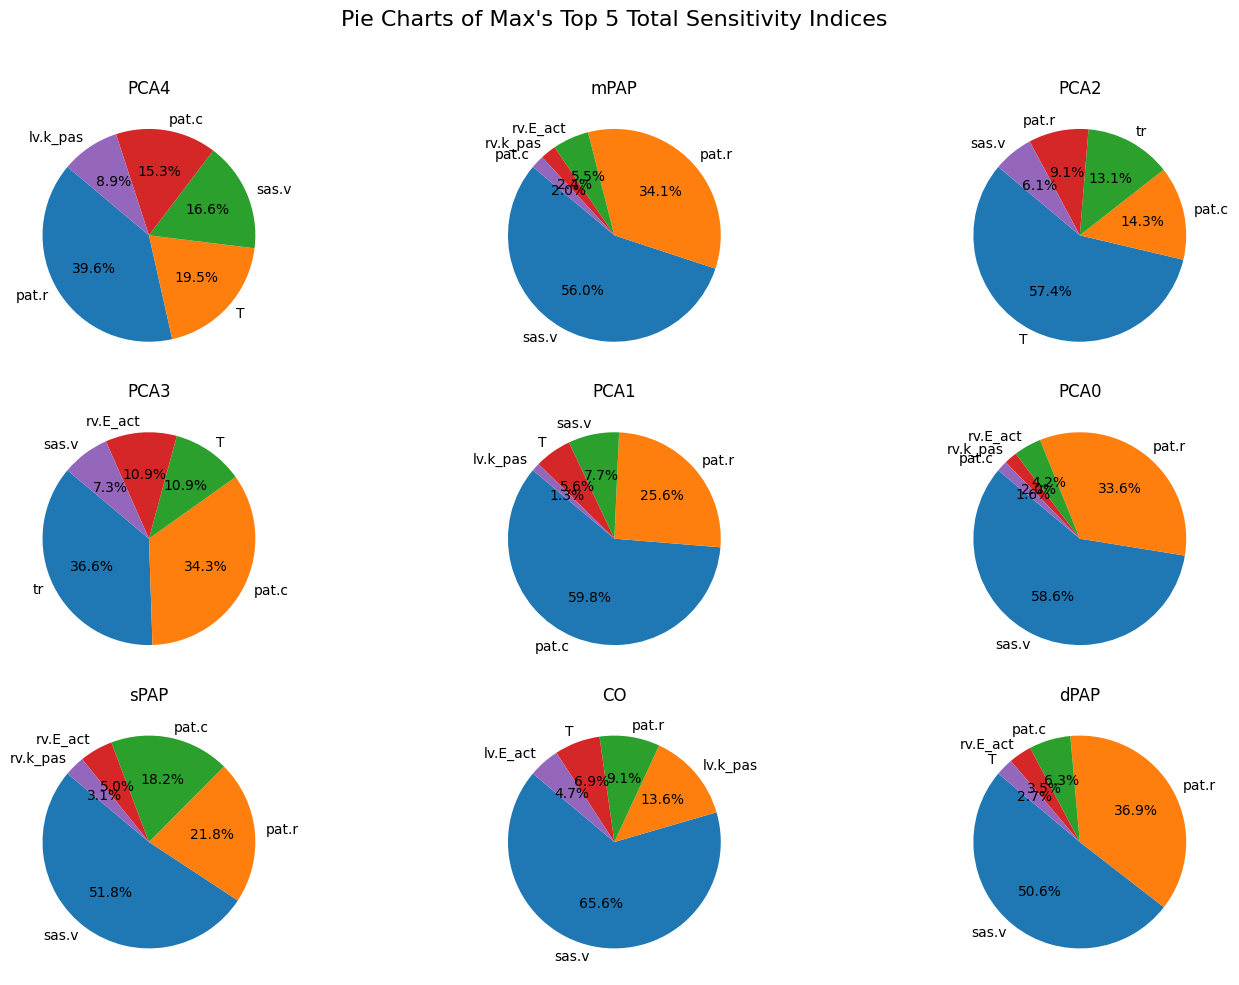

In [3]:

# Set up the overall plot
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle("Pie Charts of Max's Top 5 Total Sensitivity Indices", fontsize=16)

# Flatten the axes array to easily index subplots
axes = axes.flatten()

# Loop through the CSV files and plot pie charts
for i, file_name in enumerate(csv_files):
    # Read the CSV file
    file_path = os.path.join(csv_directory, file_name)
    df = pd.read_csv(file_path, index_col=0)
    
    # Extract data for the pie chart
    labels = df.index
    sizes = df["ST"]

    # Sort sizes and select the top 5 most sensitive parameters
    sorted_indices = sizes.argsort()[::-1][:5]
    top_sizes = sizes.iloc[sorted_indices]
    top_labels = labels[sorted_indices]

    # Extract title as the part after the last underscore in the filename
    title = file_name.rsplit("_", 1)[-1].replace(".csv", "")

    # Plot pie chart
    axes[i].pie(top_sizes, labels=top_labels, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(title)

# Remove unused subplots
for j in range(len(csv_files), len(axes)):
    fig.delaxes(axes[j])

#axes[0].set_title("Cardiac Output")
#axes[2].set_title("Max Pressure")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
